# Evaluation of Model Results
## Model M033

In [16]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
import pprint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

test = pd.read_csv('../input/test.csv')

In [17]:
tracking = pd.read_csv('../tracking/tracking.csv')
BEST_PUBLIC_RUN_ID = tracking.loc[tracking['lb_score'] == tracking['lb_score'].min()]['run_id'].values[0]
BEST_PUBLIC_SCORE = tracking.loc[tracking['lb_score'] == tracking['lb_score'].min()]['lb_score'].values[0]
print('------------------------------------------------------')
print('Currently the best public LB score is model {} with a score of {:.4f}'.format(BEST_PUBLIC_RUN_ID,
                                                                                     BEST_PUBLIC_SCORE))
print('------------------------------------------------------')
tracking.tail()

------------------------------------------------------
Currently the best public LB score is model 0629_1311 with a score of -1.4150
------------------------------------------------------


,run_id,model_number,eval_metric,n_estimators,early_stopping_rounds,random_state,n_threads,learning_rate,n_fold,model_type,training_time,n_features,gml_oof_score,oof_score,lb_score,1JHC_mae_cv,2JHH_mae_cv,1JHN_mae_cv,2JHN_mae_cv,2JHC_mae_cv,3JHH_mae_cv,3JHC_mae_cv,3JHN_mae_cv,1JHC_std_mae_cv,2JHH_std_mae_cv,1JHN_std_mae_cv,2JHN_std_mae_cv,2JHC_std_mae_cv,3JHH_std_mae_cv,3JHC_std_mae_cv,3JHN_std_mae_cv,1JHC_tr_sec_f1,1JHC_pred_sec_f1,1JHC_tr_sec_f2,1JHC_pred_sec_f2,2JHH_tr_sec_f1,2JHH_pred_sec_f1,2JHH_tr_sec_f2,2JHH_pred_sec_f2,1JHN_tr_sec_f1,1JHN_pred_sec_f1,1JHN_tr_sec_f2,1JHN_pred_sec_f2,2JHN_tr_sec_f1,2JHN_pred_sec_f1,2JHN_tr_sec_f2,2JHN_pred_sec_f2,2JHC_tr_sec_f1,2JHC_pred_sec_f1,2JHC_tr_sec_f2,2JHC_pred_sec_f2,3JHH_tr_sec_f1,3JHH_pred_sec_f1,3JHH_tr_sec_f2,3JHH_pred_sec_f2,3JHC_tr_sec_f1,3JHC_pred_sec_f1,3JHC_tr_sec_f2,3JHC_pred_sec_f2,3JHN_tr_sec_f1,3JHN_pred_sec_f1,3JHN_tr_sec_f2,3JHN_pred_sec_f2,1JHC_csv_save_sec,2JHH_csv_save_sec,1JHN_csv_save_sec,2JHN_csv_save_sec,2JHC_csv_save_sec,3JHH_csv_save_sec,3JHC_csv_save_sec,3JHN_csv_save_sec,depth,1JHC_tr_sec_f3,1JHC_pred_sec_f3,2JHH_tr_sec_f3,2JHH_pred_sec_f3,1JHN_tr_sec_f3,1JHN_pred_sec_f3,2JHN_tr_sec_f3,2JHN_pred_sec_f3,3JHH_tr_sec_f3,3JHH_pred_sec_f3,2JHC_tr_sec_f3,2JHC_pred_sec_f3,3JHC_tr_sec_f3,3JHC_pred_sec_f3,3JHN_tr_sec_f3,3JHN_pred_sec_f3
34,0704_1132,M033,group_mae,5000000.0,50.0,529.0,24.0,0.10,2.0,lgbm,NaN,295.0,NaN,NaN,NaN,NaN,0.188,0.4103,0.1646,NaN,0.2309,NaN,NaN,NaN,0.0,0.000000,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1409.0,348.0,NaN,NaN,49.0,8.0,NaN,NaN,170.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,3052.0,899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,26.0,26.0,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,0704_1133,M033,group_mae,5000000.0,50.0,529.0,24.0,0.10,2.0,lgbm,30530.0,295.0,1.4555,16.5716,NaN,NaN,0.187,0.4194,0.1629,0.3342,0.2343,0.4551,0.193,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,951.0,203.0,NaN,NaN,33.0,7.0,NaN,NaN,214.0,38.0,NaN,NaN,8539.0,3842.0,NaN,NaN,1926.0,453.0,NaN,NaN,9209.0,4608.0,NaN,NaN,162.0,65.0,NaN,26.0,26.0,27.0,27.0,26.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,0704_1348,M033,group_mae,5000000.0,50.0,529.0,24.0,0.10,2.0,lgbm,NaN,295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,0704_2235,M034,MAE,500000.0,50.0,529.0,16.0,0.05,2.0,catboost,NaN,295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,0704_2236,M034,MAE,500000.0,50.0,529.0,16.0,0.05,2.0,catboost,NaN,295.0,NaN,NaN,NaN,NaN,NaN,0.5957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294.0,0.0,212.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# RUN_ID = 'M026_COMBINED'
MODEL_NO = 'M033'
# sub_file = [x for x in os.listdir('../submissions/') if RUN_ID in x][0]
# fi_file = [x for x in os.listdir('../fi/') if RUN_ID in x][0]
# oof_file = [x for x in os.listdir('../oof') if RUN_ID in x][0]
# print(sub_file)
# Read in files for new RUN_ID
sub = pd.read_csv(f'../submissions/M033_0704_1133_submission_lgb_2folds_1.4555CV_5000000iter_0.1lr.csv')
oof = pd.read_csv(f'../oof/M033_0704_1133_oof_lgb_2folds_1.4555CV_5000000iter_0.1lr.csv')
fi = pd.read_csv(f'../fi/M033_0704_1133_fi_lgb_2folds_1.4555CV_5000000iter_0.1lr.csv')

# Read in files for best RUN_ID
bsub_file = [x for x in os.listdir('../submissions/') if BEST_PUBLIC_RUN_ID in x][0]
#bfi_file = [x for x in os.listdir('../fi/') if BEST_PUBLIC_RUN_ID in x][0]
boof_file = [x for x in os.listdir('../oof') if BEST_PUBLIC_RUN_ID in x][0]
bsub = pd.read_csv(f'../submissions/{bsub_file}')
boof = pd.read_csv(f'../oof/{boof_file}')
# bfi = pd.read_csv(f'../fi/{bfi_file}')

## Features with no importance

In [19]:
fi_mean = fi.groupby('feature').mean()
no_importance_features = fi_mean.loc[fi_mean['importance'] == 0].index.tolist()
print('Features with no importance at all')
pprint.pprint(no_importance_features)

Features with no importance at all
['20th_closest_to_0_spin_multiplicity',
 '20th_closest_to_1_spin_multiplicity',
 '21st_closest_to_0_spin_multiplicity',
 '22nd_closest_to_0_spin_multiplicity',
 '22nd_closest_to_1_spin_multiplicity',
 '23rd_closest_to_0_spin_multiplicity',
 '23rd_closest_to_1_spin_multiplicity',
 '24th_closest_to_0_spin_multiplicity',
 '24th_closest_to_1_spin_multiplicity',
 '25th_closest_to_0_spin_multiplicity',
 '25th_closest_to_1_spin_multiplicity',
 '26th_closest_to_0_atomic_mass',
 '26th_closest_to_0_spin_multiplicity',
 '26th_closest_to_0_valence',
 '26th_closest_to_1_atomic_mass',
 '26th_closest_to_1_spin_multiplicity',
 '26th_closest_to_1_valence',
 '27th_closest_to_0_atomic_mass',
 '27th_closest_to_0_spin_multiplicity',
 '27th_closest_to_0_valence',
 '27th_closest_to_1_atomic_mass',
 '27th_closest_to_1_dist_x_atomic_mass',
 '27th_closest_to_1_spin_multiplicity',
 '27th_closest_to_1_valence',
 '28th_closest_to_0_atomic_mass',
 '28th_closest_to_0_dist_x_atomic_

## Feature with no importance by type

In [20]:
fi_minus_non_imp = fi.loc[~fi['feature'].isin(no_importance_features)]
for i, d in fi_minus_non_imp.groupby('type'):
    d_mean = d.groupby('feature').mean()
    d_mean.loc[d_mean['importance'] == 0]
    print('================== Type {} =================='.format(i))
    print([x for x in d_mean.loc[d_mean['importance'] == 0].index])

================== Type 1JHN ==================
['14th_closest_to_1_spin_multiplicity', '17th_closest_to_0_spin_multiplicity', '18th_closest_to_0_spin_multiplicity', '18th_closest_to_1_spin_multiplicity', '19th_closest_to_0_atomic_mass', '19th_closest_to_1_spin_multiplicity', '20th_closest_to_0_valence', '20th_closest_to_1_atomic_mass', '21st_closest_to_0_atomic_mass', '21st_closest_to_0_valence', '21st_closest_to_1_atomic_mass', '21st_closest_to_1_spin_multiplicity', '21st_closest_to_1_valence', '22nd_closest_to_0_atomic_mass', '22nd_closest_to_0_valence', '22nd_closest_to_1_atomic_mass', '22nd_closest_to_1_dist_x_atomic_mass', '22nd_closest_to_1_valence', '23rd_closest_to_0_atomic_mass', '23rd_closest_to_0_dist_x_atomic_mass', '23rd_closest_to_0_valence', '23rd_closest_to_1_atomic_mass', '23rd_closest_to_1_dist_x_atomic_mass', '23rd_closest_to_1_valence', 'closest_to_0_atomic_mass', 'closest_to_0_dist_x_atomic_mass', 'closest_to_0_spin_multiplicity', 'closest_to_0_valence', 'closest_

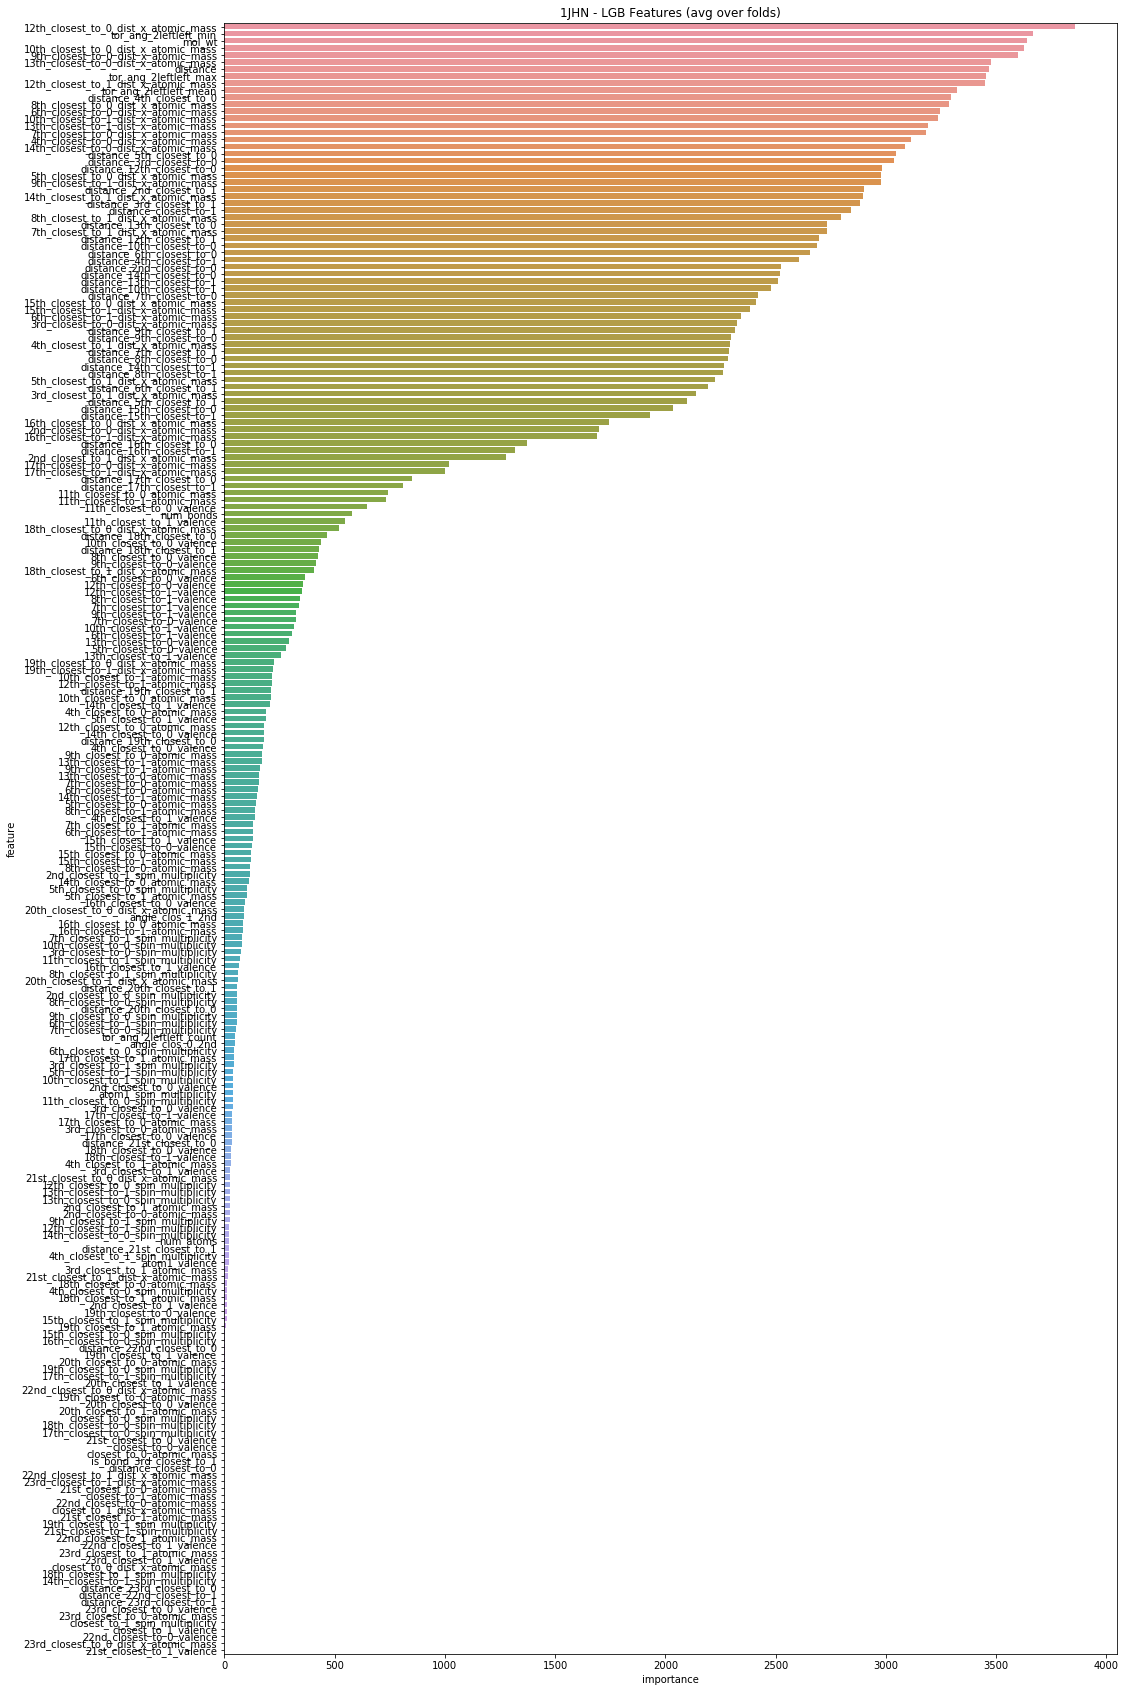

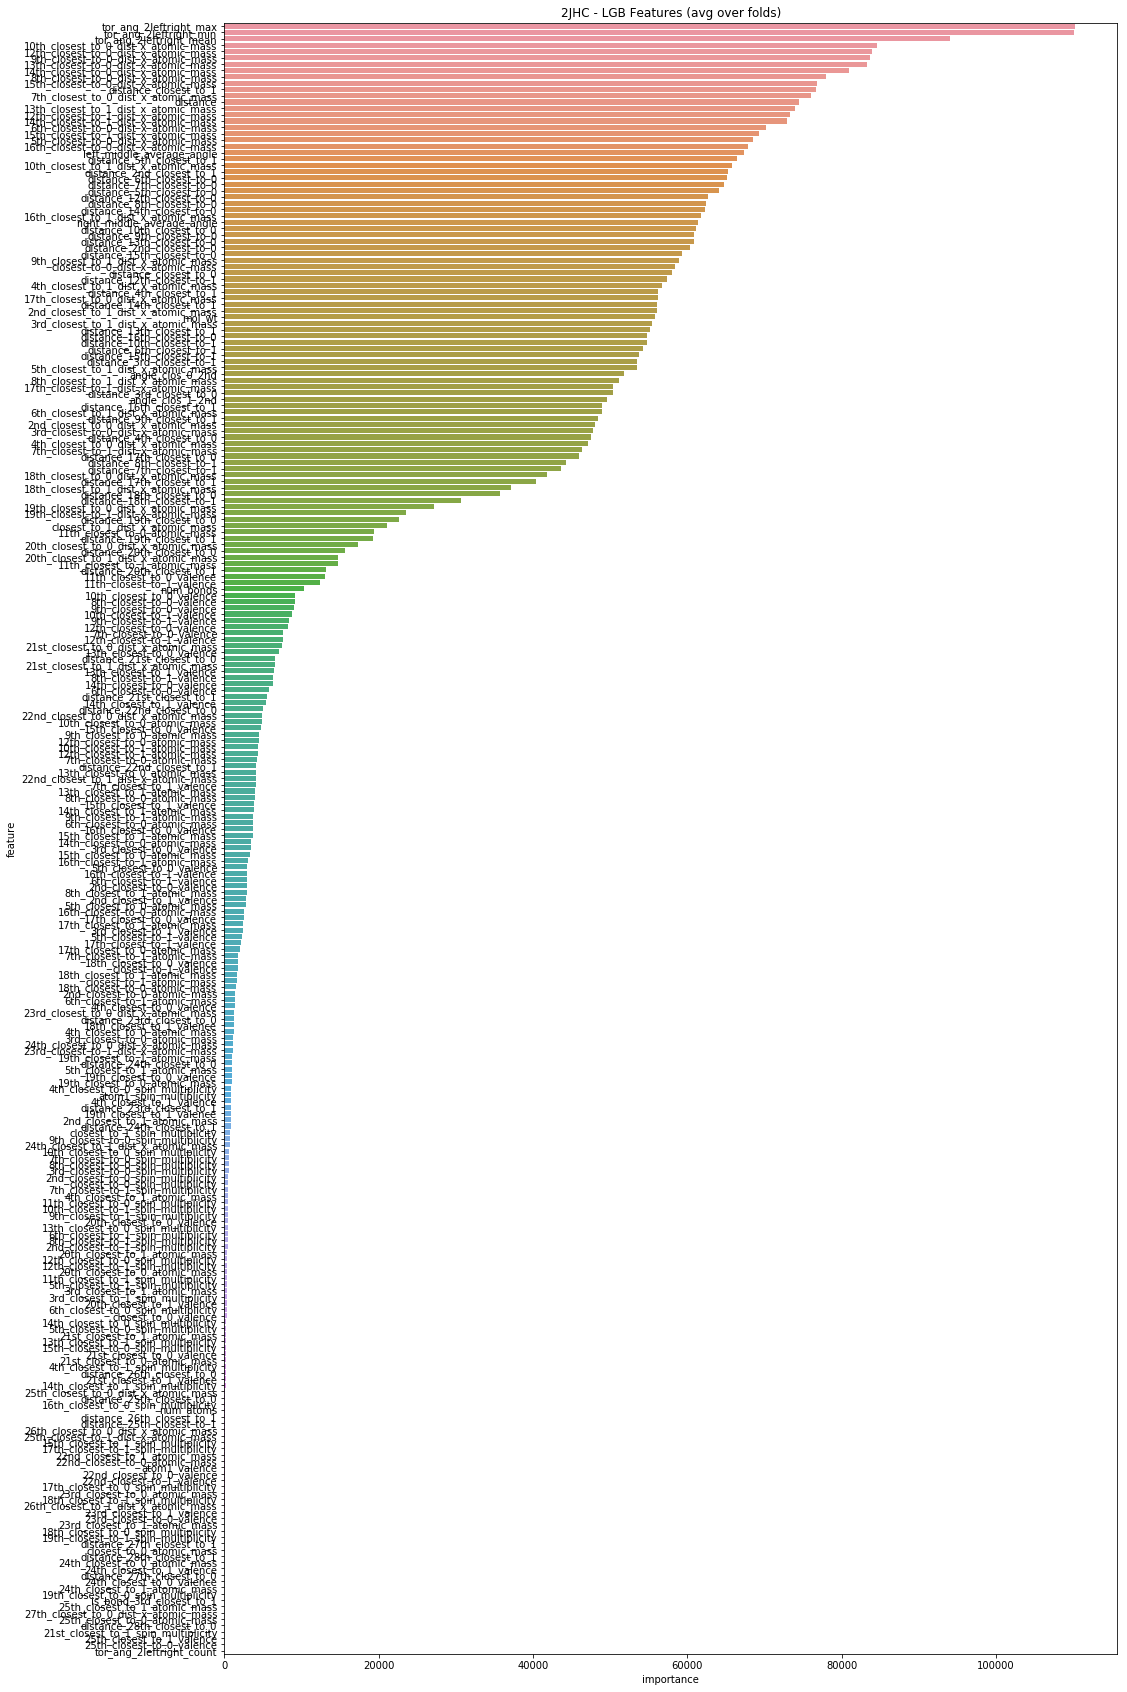

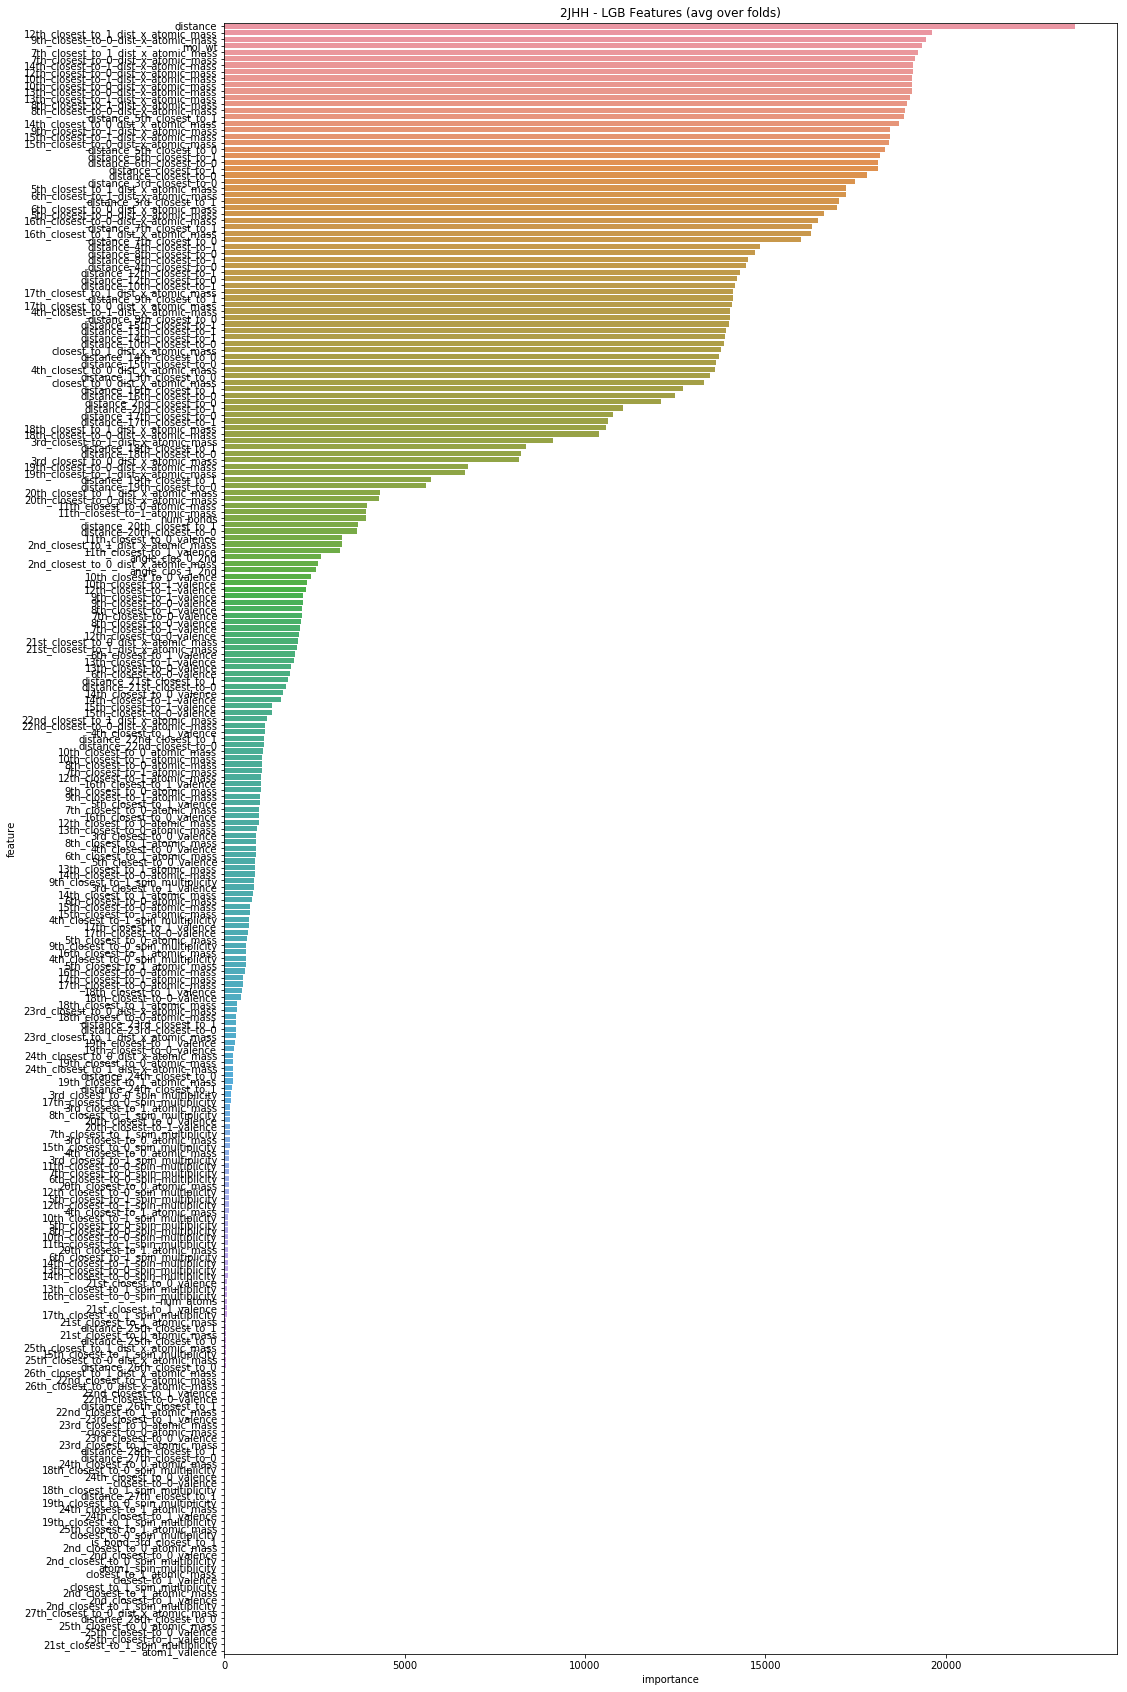

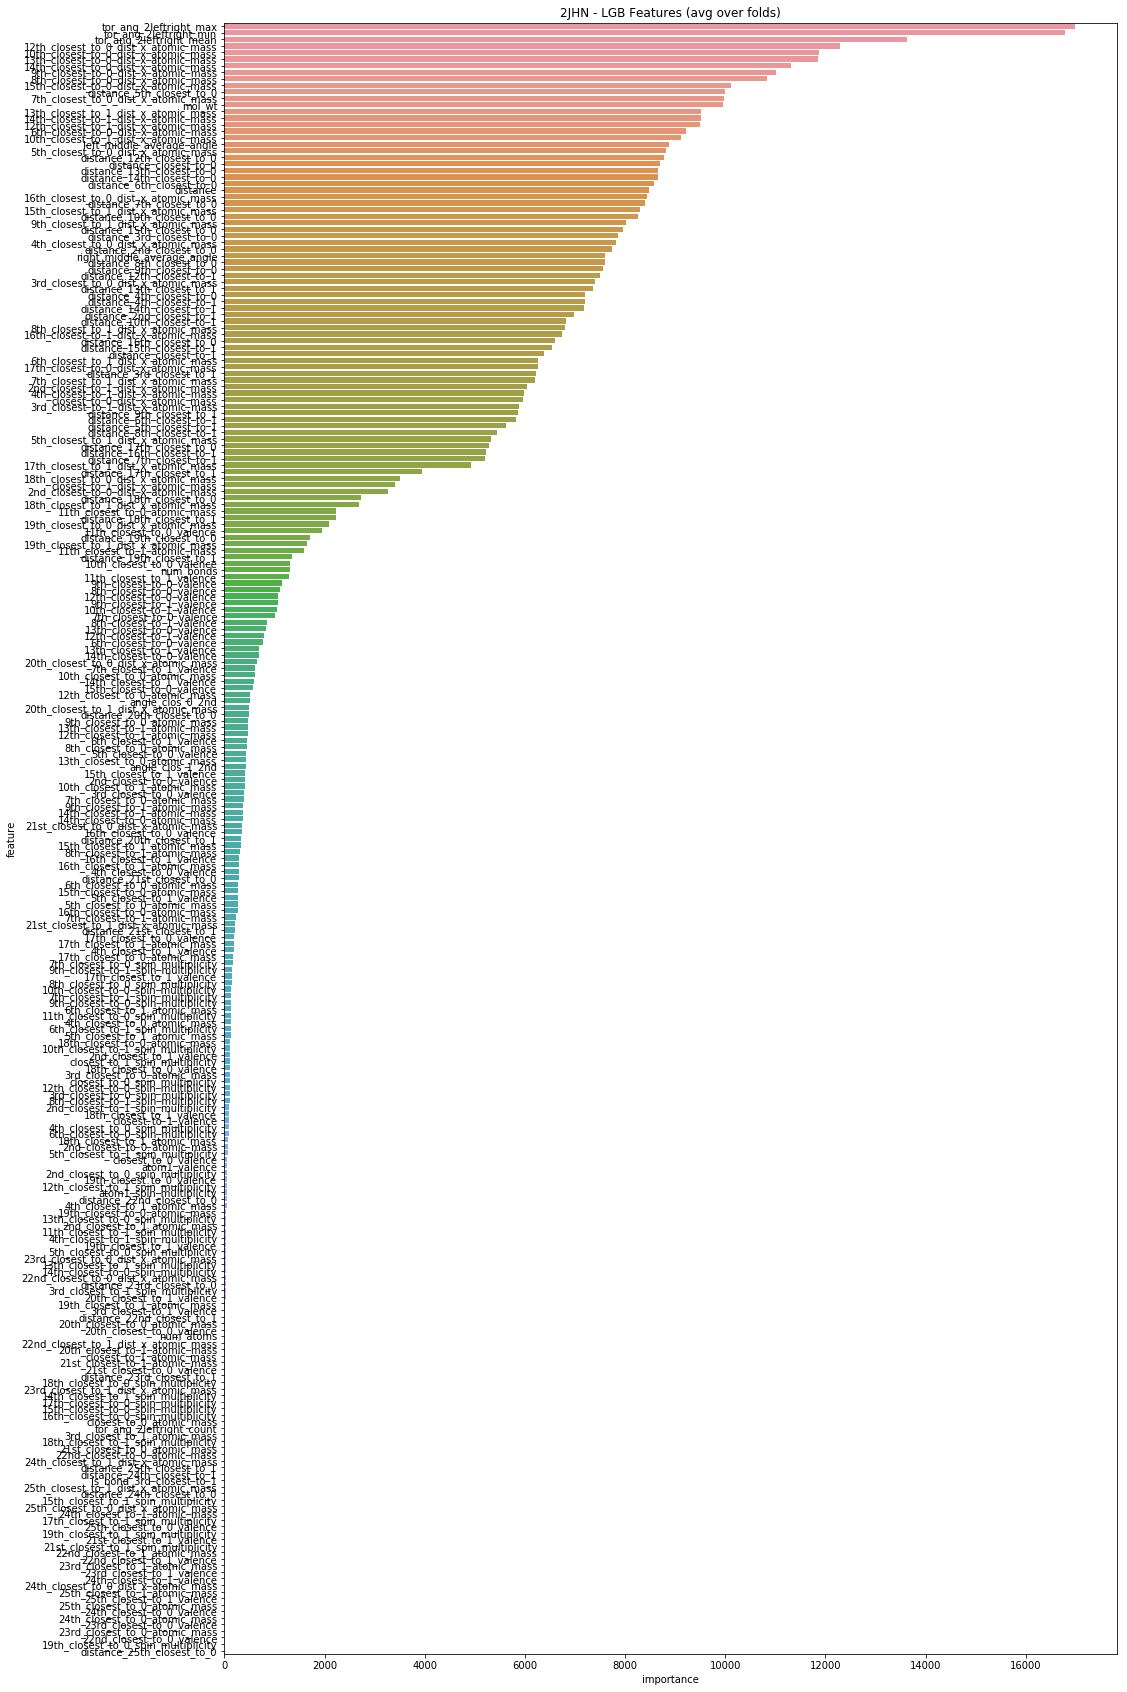

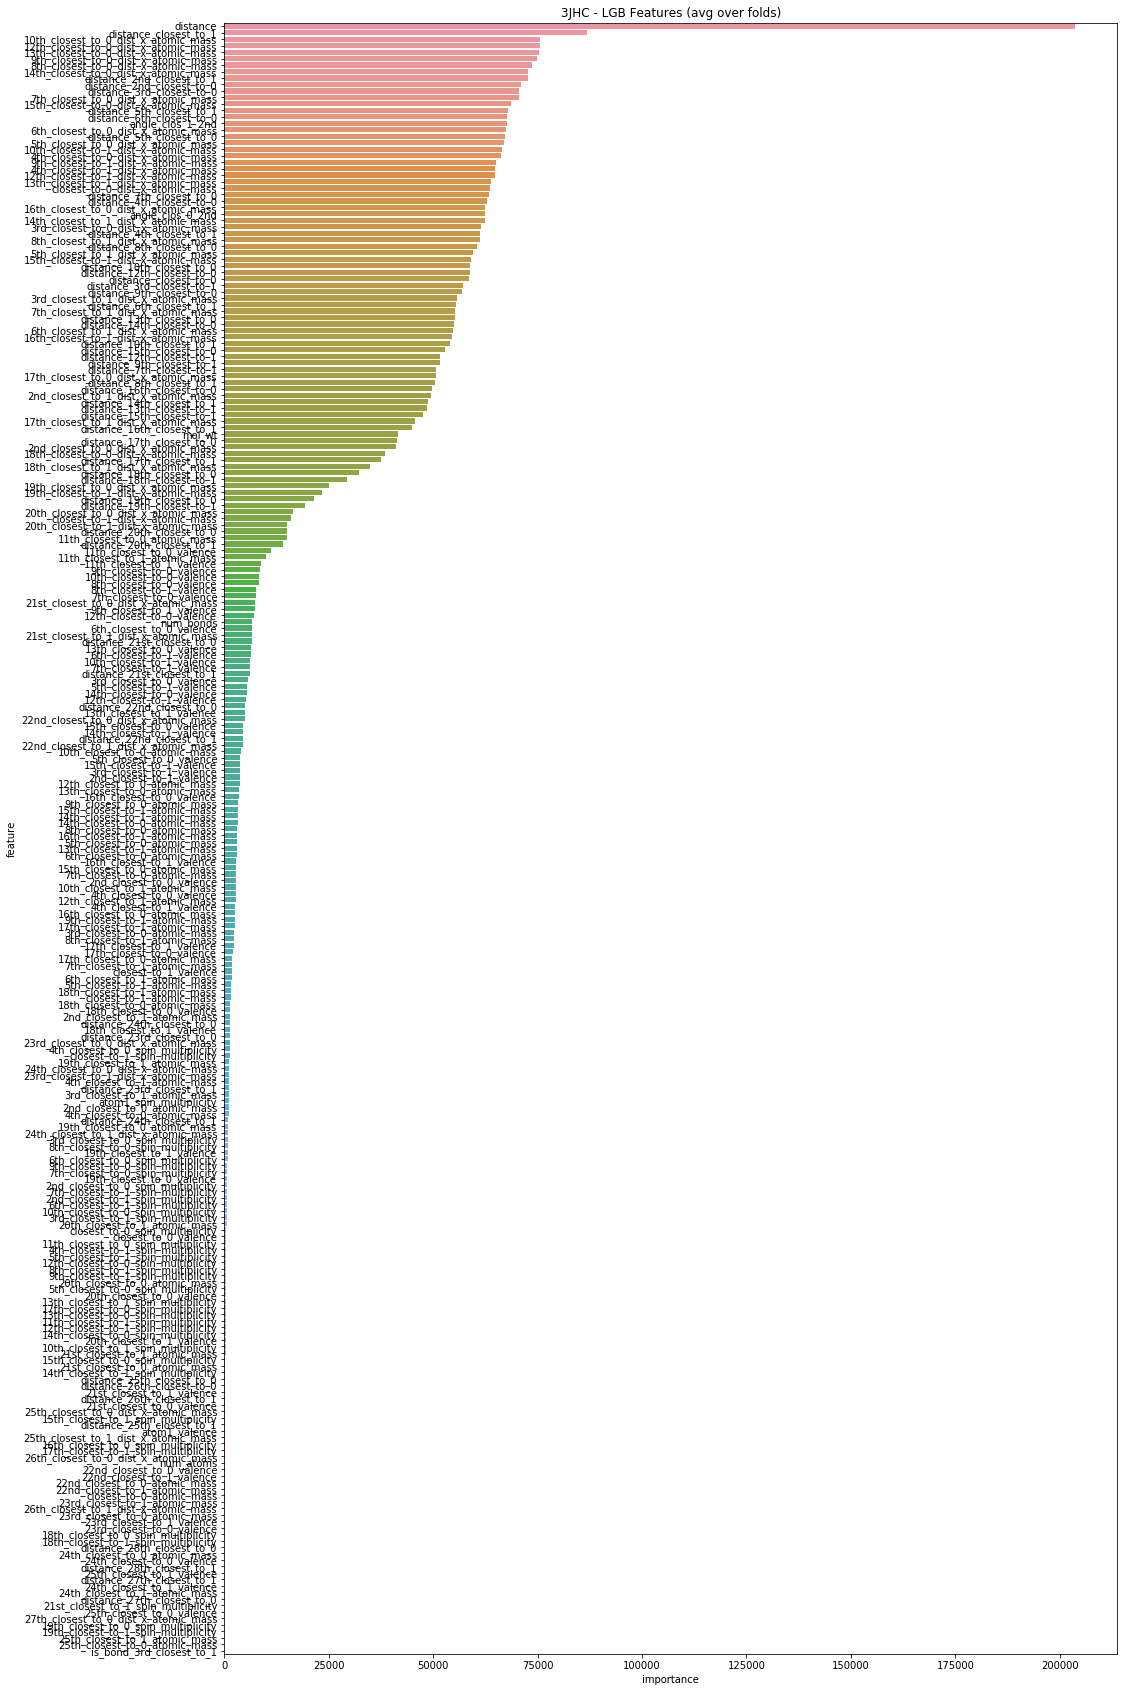

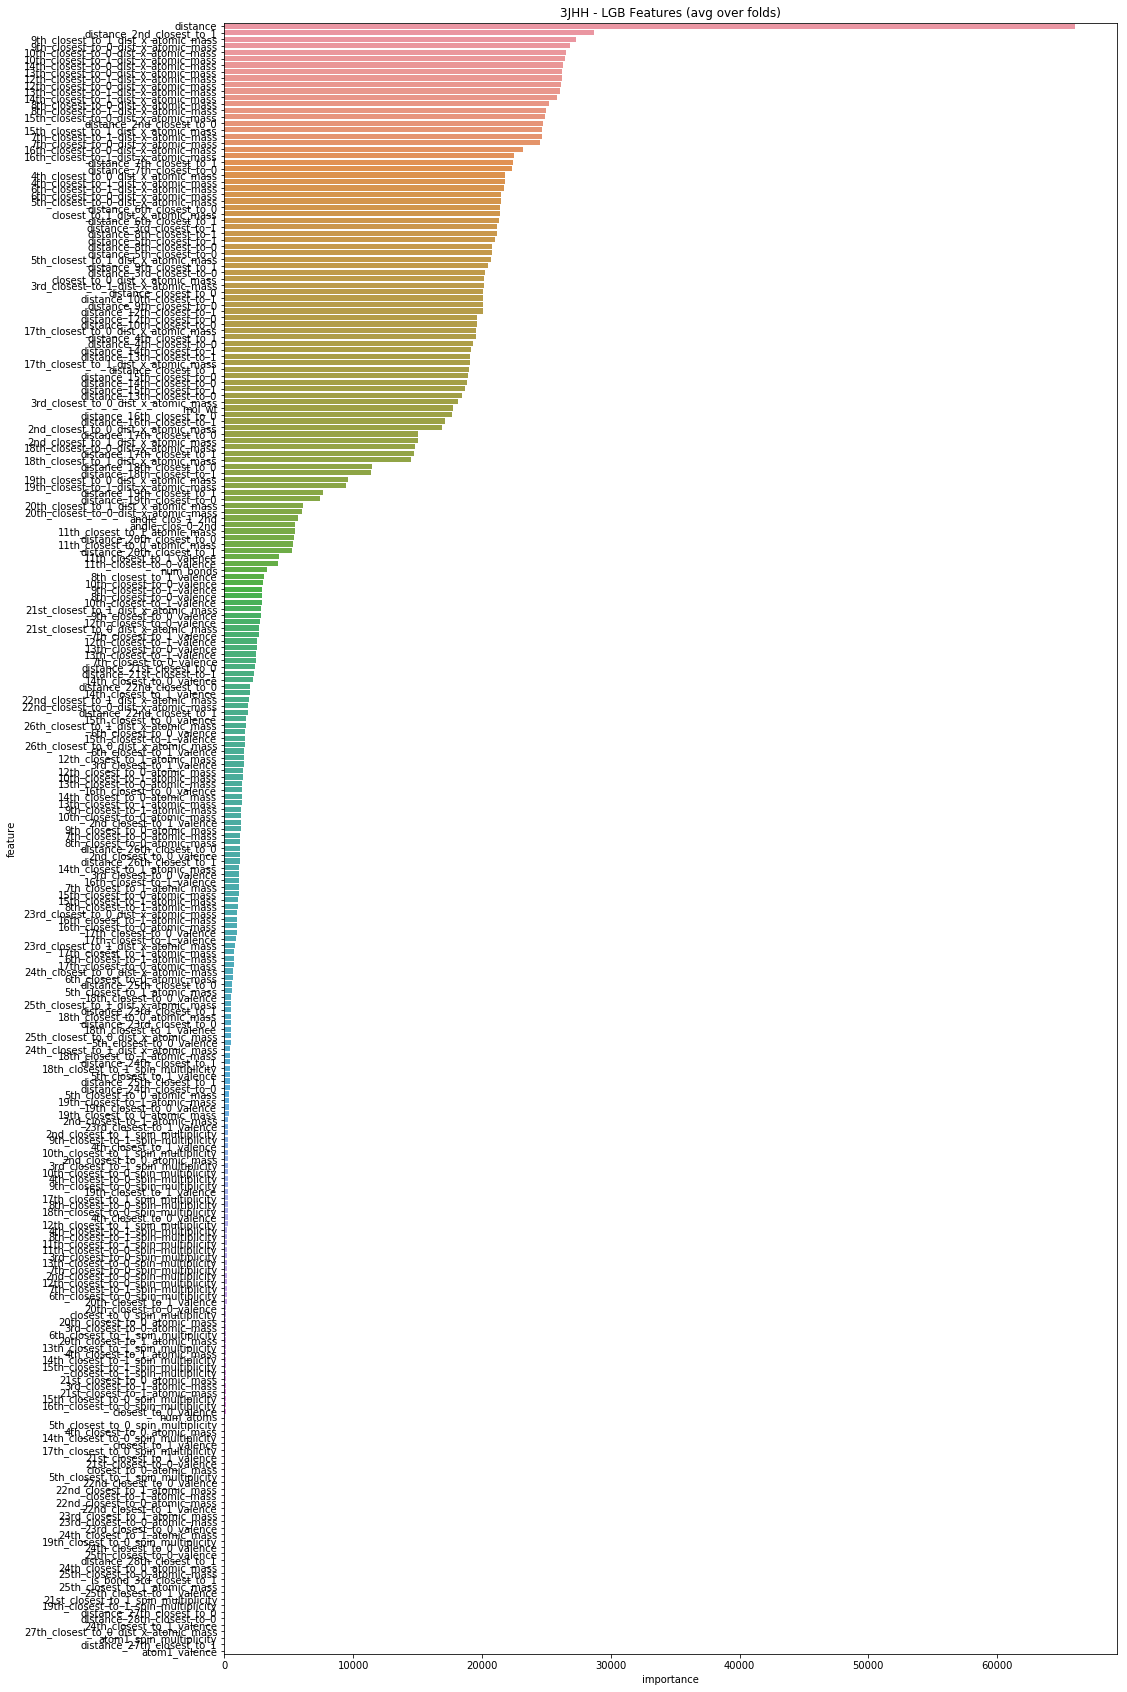

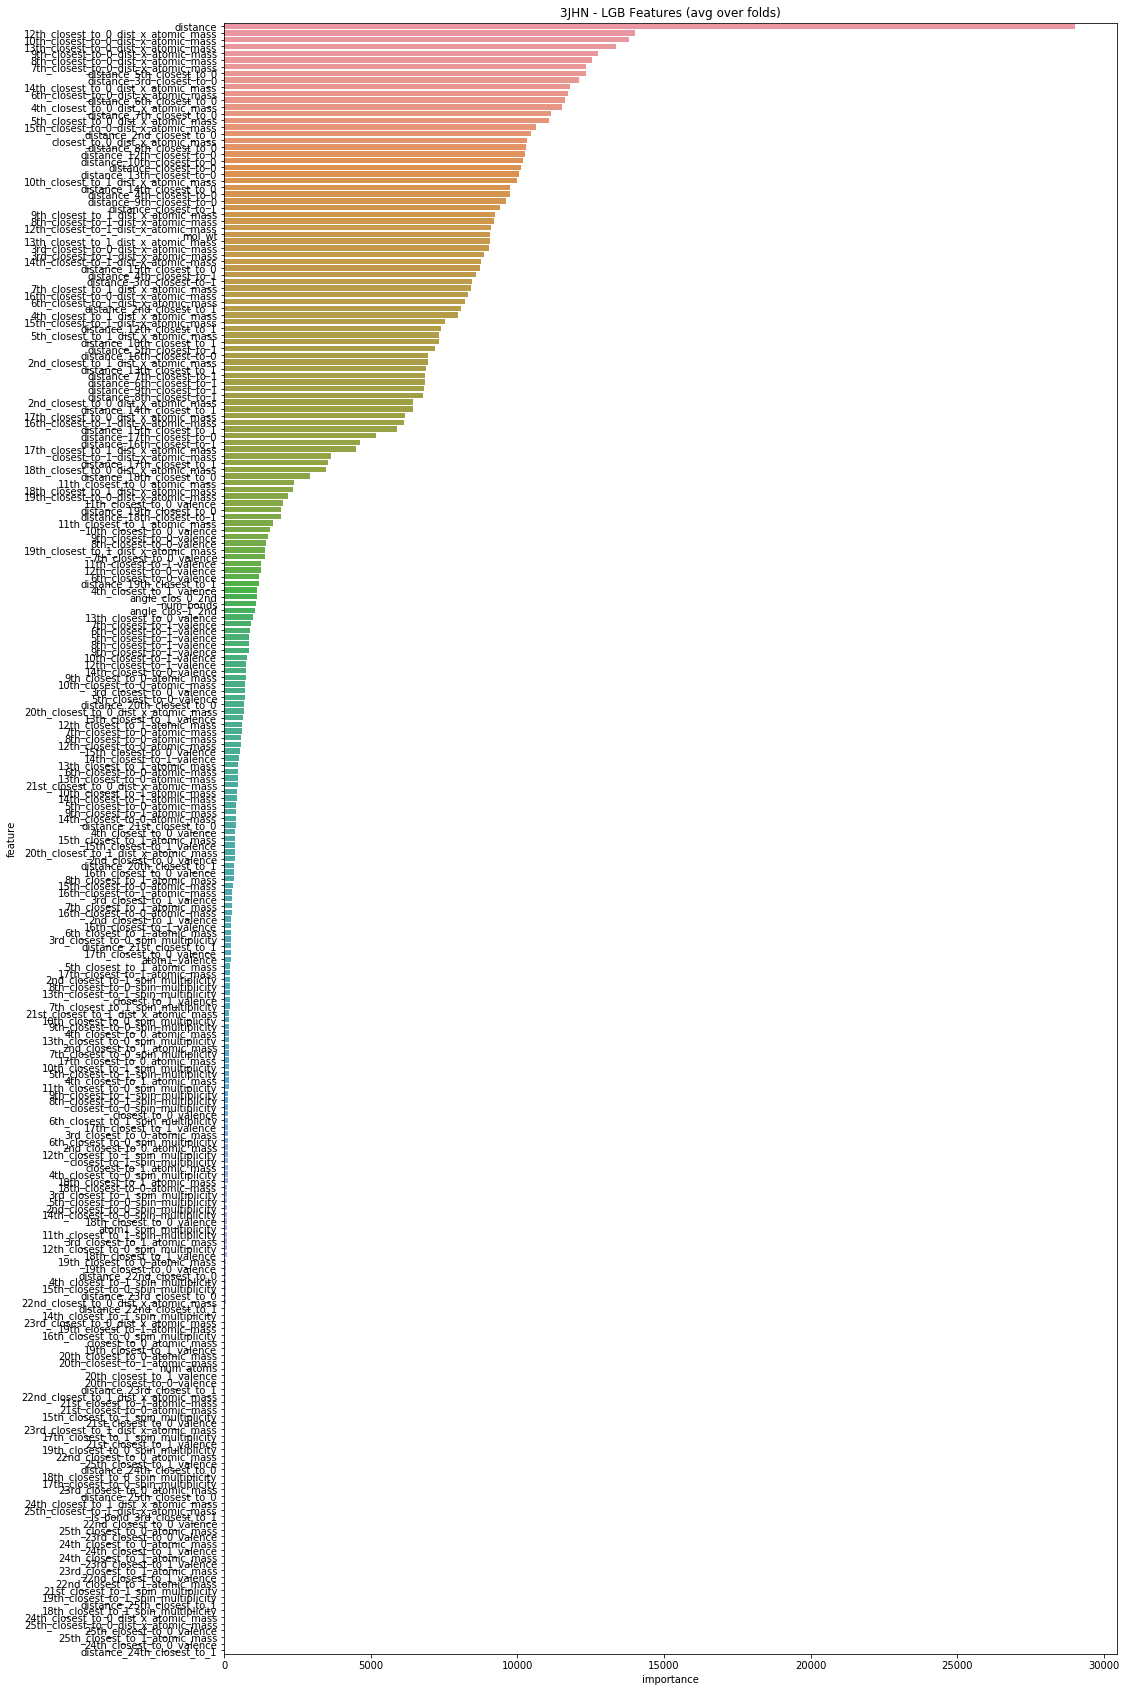

In [21]:
for i, d in fi_minus_non_imp.groupby('type'):
    plt.figure(figsize=(16, 30));
    sns.barplot(x="importance", y="feature", data=d.sort_values(by="importance", ascending=False));
    plt.title('{} - LGB Features (avg over folds)'.format(i))
    plt.show()

# Compare Submission Files

In [8]:
sub['type'] = test['type']
bsub['type'] = test['type']

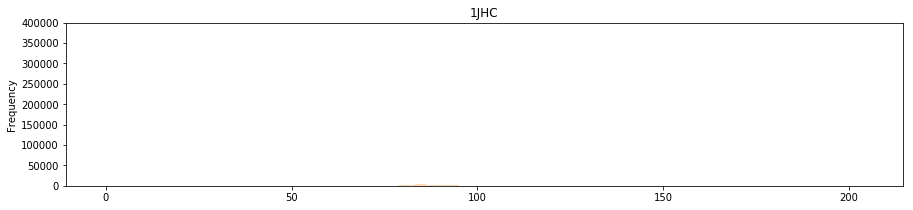

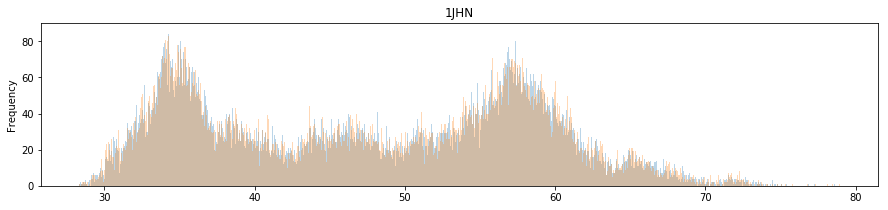

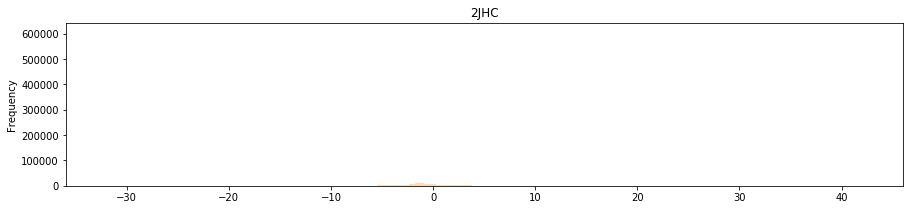

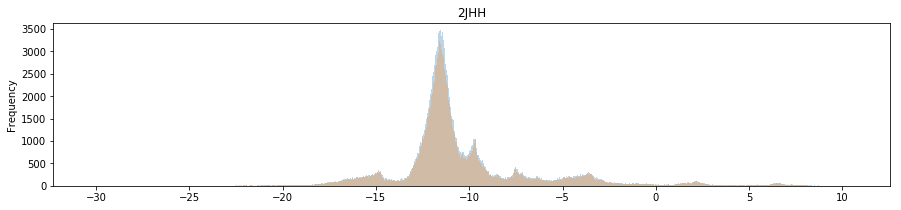

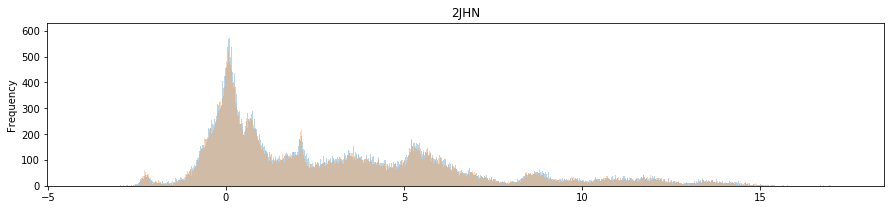

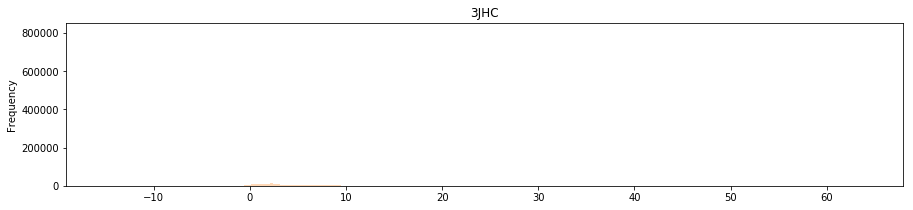

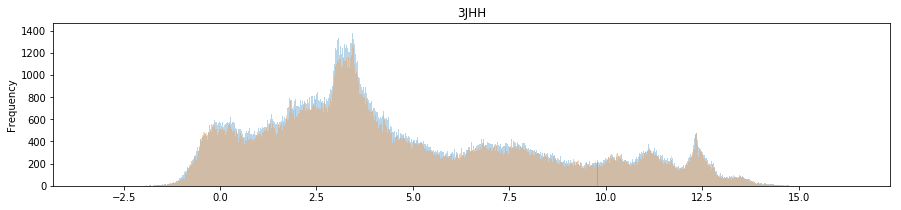

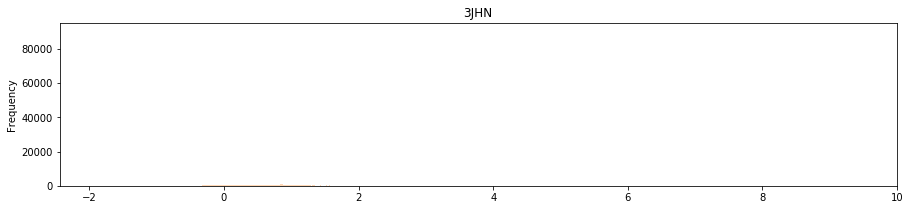

In [9]:
for i, d in sub.groupby('type'):
    d['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    # also plot best sub
    d_bsub = bsub.loc[bsub['type'] == i]
    d_bsub['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    #d_oof = oof.loc[oof['type'] == i]
    #d_oof['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    plt.show()

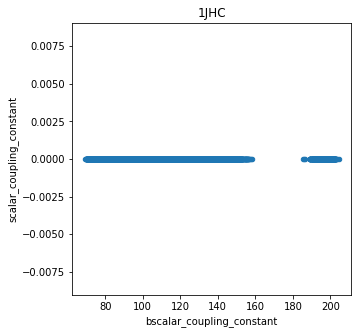

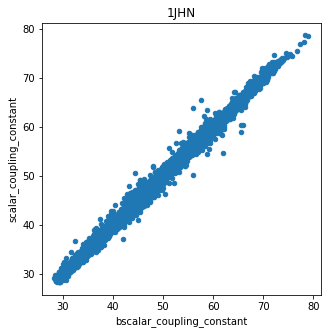

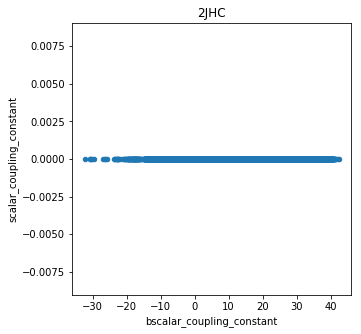

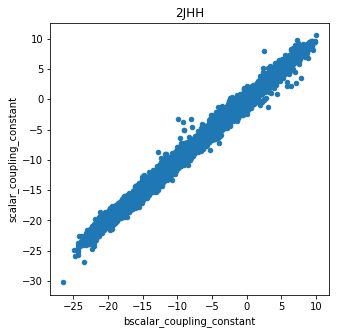

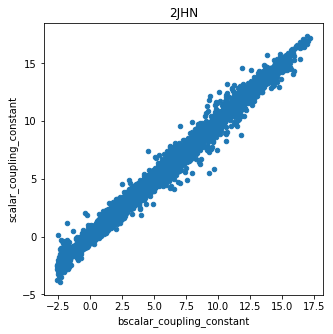

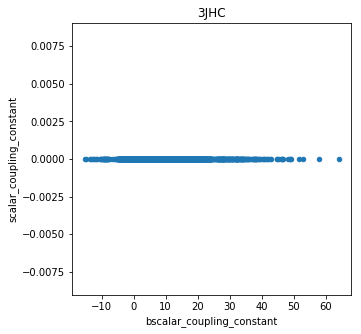

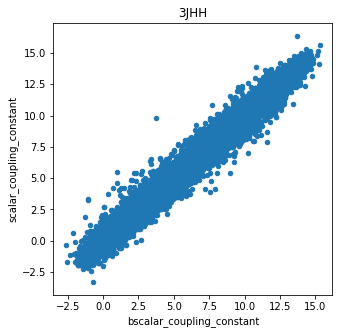

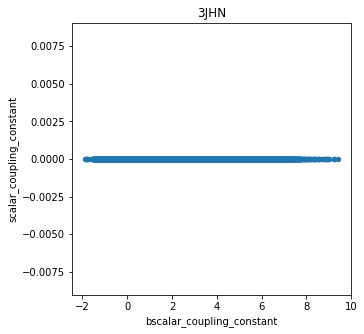

In [10]:
sub['bscalar_coupling_constant'] = bsub['scalar_coupling_constant']
# Scatter plot of submission
for i, d in sub.groupby('type'):
    d.plot(x='bscalar_coupling_constant', y='scalar_coupling_constant', kind='scatter', figsize=(5, 5), title=i)

# Compare OOF

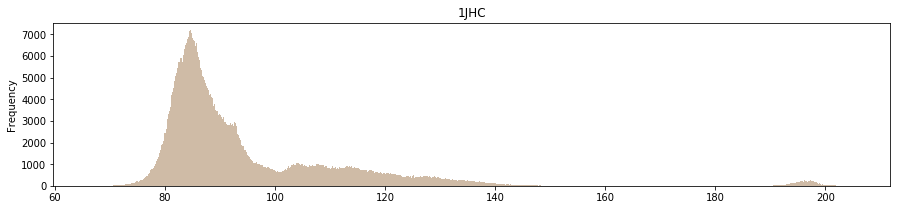

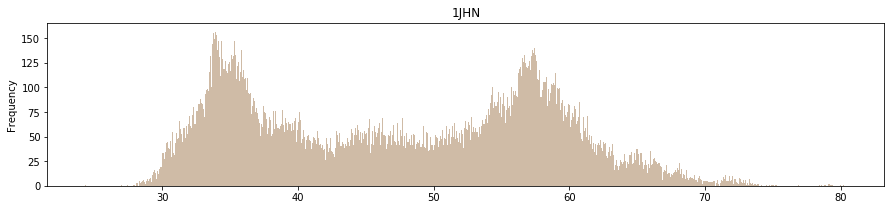

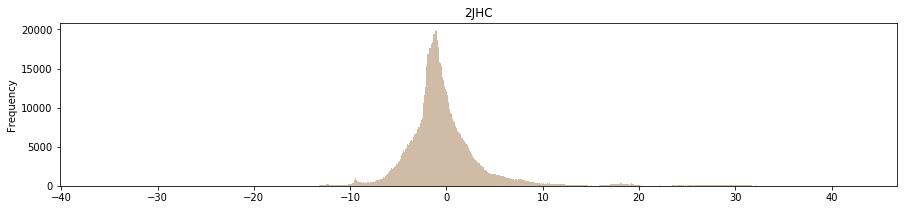

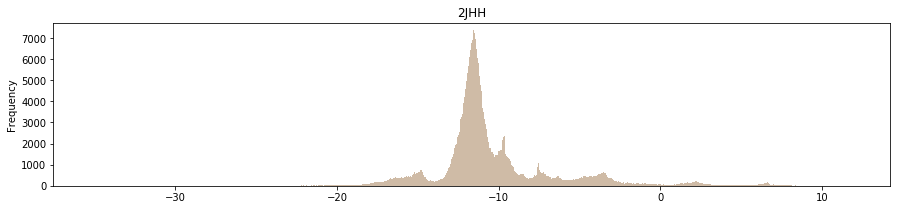

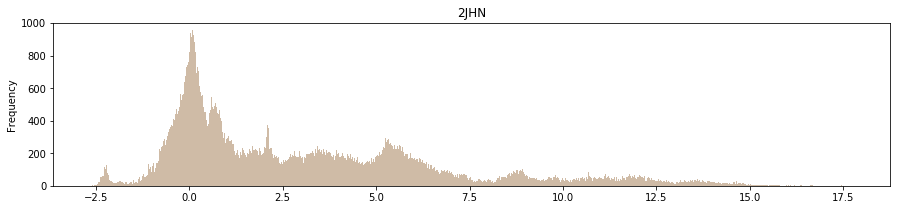

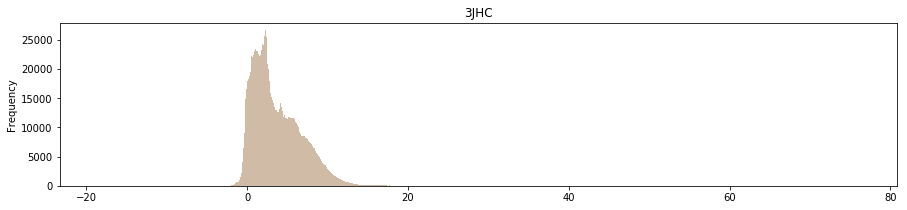

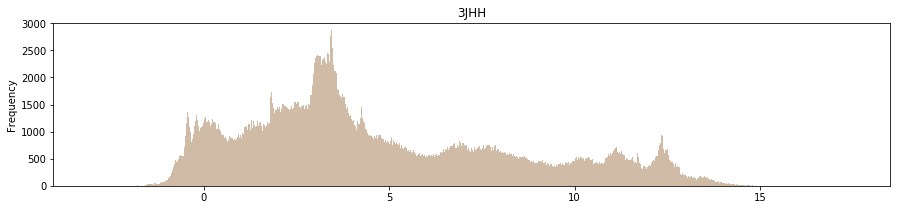

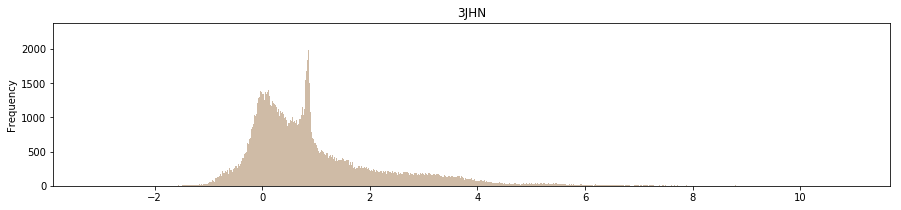

In [22]:
for i, d in oof.groupby('type'):
    d['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    # also plot best sub
    d_boof = boof.loc[boof['type'] == i]
    d_boof['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    plt.show()

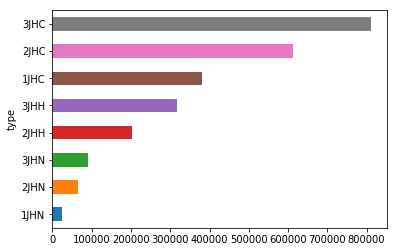

In [ ]:
sub.groupby('type').count()['id'].sort_values().plot(kind='barh')

# Update Leaderboard score

In [11]:
# LB_SCORE = -1.382
# tracking = pd.read_csv('../tracking/tracking.csv')
# tracking.loc[tracking['run_id'] == RUN_ID, 'lb_score'] = LB_SCORE
# tracking.to_csv('../tracking/tracking.csv', index=False)